# Overview on the chiral centers for compounds found in patents
This notebook calculates the distribution of chiral centers for compounds found in patent documents.

# Import Modules

In [1]:
import json
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

tqdm.pandas()

# Add path constants

In [2]:
MAPPING_DIR = '../data/mappings/'
FIGURE_DIR = '../data/figures'

# Load properties data dump

In [3]:
properties_dict = json.load(open(f'{MAPPING_DIR}/properties.json'))

In [4]:
properties_df = pd.DataFrame(properties_dict)
properties_df = properties_df.T
properties_df.reset_index(inplace=True)
properties_df.rename(columns={'index': 'SMILES'}, inplace=True)
properties_df = properties_df[['SMILES']]
properties_df.head(2)

,SMILES
0,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O
1,O=C(O)\C=C/C(=O)O.CCOC(=O)[C@H](CCC1=CC=CC=C1)...


In [5]:
len(properties_df)

10695979

# Removal of salts from the compound list

In [6]:
compounds_with_salt = set()

for smile in tqdm(properties_df['SMILES'].unique()):
    if '.' in smile:
        compounds_with_salt.add(smile)

len(compounds_with_salt)

100%|██████████| 10695979/10695979 [00:03<00:00, 2690864.36it/s]


328882

In [7]:
final_compound_df = properties_df[~properties_df['SMILES'].isin(compounds_with_salt)]
final_compound_df.shape

(10367097, 1)

# Statistical distribution of chiral compounds

In [8]:
chiral_count_ditc = {
    '0': 0,
    '1': 0,
    '2-5': 0,
    '6-10': 0,
    '>10': 0
}

for smile in tqdm(final_compound_df['SMILES'].unique()):
    chiral_count = smile.count('@')
    if chiral_count < 1:
        chiral_count_ditc['0'] += 1
    elif chiral_count == 1:
        chiral_count_ditc['1'] += 1
    elif chiral_count < 6:
        chiral_count_ditc['2-5'] += 1
    elif chiral_count < 11:
        chiral_count_ditc['6-10'] += 1
    else:
        chiral_count_ditc['>10'] += 1

100%|██████████| 10367097/10367097 [00:08<00:00, 1256197.39it/s]


In [9]:
data = pd.DataFrame(chiral_count_ditc.values(), index=chiral_count_ditc.keys(), columns=['counter']).reset_index()
data = data.rename(columns={'index': 'chiral_center_counts'})
data

,chiral_center_counts,counter
0,0,7470375
1,1,581084
2,2-5,1741474
3,6-10,392517
4,>10,181647


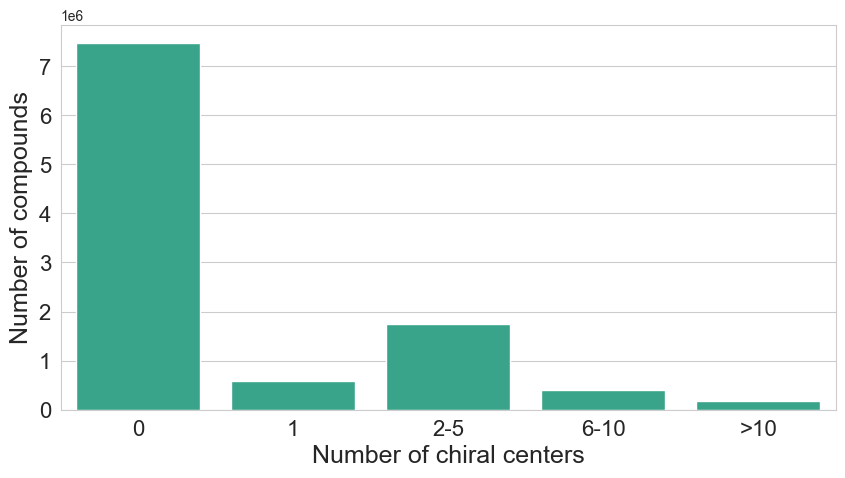

In [10]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.barplot(
    data=data, 
    x='chiral_center_counts', 
    y='counter', 
    color='#27b692'
)
plt.xlabel('Number of chiral centers', fontsize=18)
plt.ylabel('Number of compounds', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(f'{FIGURE_DIR}/supplementary_figure_2.png', dpi=400, bbox_inches='tight')
plt.show()